---

title: "重新认识相关系数"
date: 2024-11-24
author: 郝鸿涛
slug: corr
draft: false
toc: true
tags: 统计

---

以下是维基百科上解释皮尔逊相关系数的一张图：

![](img/corr-wikipedia.png)

应该很好理解。这篇博客主要讲解相关系数是怎么算出来的。

相关系数描述的是两个变量之前相互依存的程度 (a measure of dependence between two quantities)。但是这个不好定量。为了好理解，我把「相互依存」理解为两个变量「共同变化」的程度。

我举一个例子：

Text(0, 0.5, 'b')

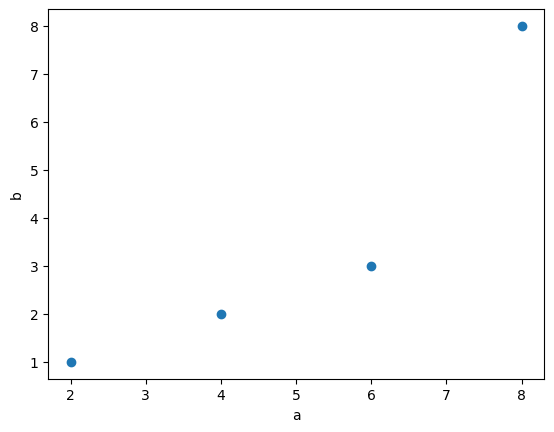

In [88]:
#| code-fold:true

import numpy as np 
import matplotlib.pyplot as plt

a = [2, 4, 6, 8]
b = [1, 2, 3, 8]
fig1, ax = plt.subplots(1, 1)
ax.scatter(a,b)
plt.xlabel('a')
plt.ylabel('b')

当两个变量共同变化时：

1. 如果一个变量中的元素增大，另一个变量中的对应元素也会增大。
2. 如果一个变量中的元素「大幅」增大，另一个变量中的对应元素也会「大幅」增大。

同样的逻辑适用于减少的情况。

上面的描述回答了「共同」是什么这个问题。但，如何理解「变化」？当我们说「如果一个变量中的元素增大」，参照物是什么？

可选的参照物有很多，比如均值、中位数、众数、最大值、最小值等。我们选均值作为参照物。为什么不选别的？之后再回答这个问题。

有了参照物，我们把上面的话重新说一下：

1. 当变量 `a` 中的元素相对于 $\bar{a}$ 增大，那么变量 `b` 中的元素也相对于 $\bar{b}$ 增大。
2. 当变量 `a` 中的元素相对于 $\bar{a}$ 大幅增大，那么变量 `b` 中的元素也相对于 $\bar{b}$ 大幅增大。

同样的逻辑适用于减少的情况。

如果这就是「相互依存」的定义，那么，当 `a` 与 `b` 「相互依存」时，$a_i - \bar{a}$ 与 $b_i - \bar{b}$ 有如下性质：

1. 正负符号相同。因此 $(a_i - \bar{a}) \cdot (b_i - \bar{b})$ 一定为正。
2. 当 $a_i - \bar{a}$ 很大时， $b_i - \bar{b}$ 同样很大。

## 协方差

我们把 $a_i - \bar{a}$ 与 $b_i - \bar{b}$ 称为偏差对 (deviation pair)。

我们真正感兴趣的是两个变量之间的「相互依存」，而不是单个元素之间的关系，因此我们需要考虑所有的「偏差对」，因此我们计算偏差对乘积之和：

$$\sum_{i=1}^{N}(a_i - \bar{a}) \cdot (b_i - \bar{b})$$

考虑到变量的大小，为了便于比较，我们取平均数，而这就是[协方差 (Covariance)](https://en.wikipedia.org/wiki/Covariance) 的定义：

$$Cov(a, b) = \frac{\sum_{i=1}^{N}(a_i - \bar{a}) \cdot (b_i - \bar{b})}{N}$$

其中，$N$ 是样本大小。

如果我们是用样本估计总体，那我们需要用[贝塞尔校正](https://en.wikipedia.org/wiki/Bessel%27s_correction)修正样本协方差的偏差：

$$Cov(a, b) = \frac{\sum_{i=1}^{N}(a_i - \bar{a}) \cdot (b_i - \bar{b})}{N-1}$$

但我们可能还是会比较困惑，为什么这么算出来的结果就大体上告诉我们$a_i - \bar{a}$ 与 $b_i - \bar{b}$ 正负符号相同呢？

下面我们会解释到。

## 相关系数

协方差可以用来检测第一条性质。那第二条性质呢？

当 $a_i - \bar{a}$ 很大时， $b_i - \bar{b}$ 同样很大。

这条性质，我们怎么量化呢？是否可以这么理解，如果两个变量「完全」「相互依存」，那么对于所有的 $i$:

$$\frac{a_i - \bar{a}}{b_i - \bar{b}} = k$$

$k$ 应该是一个常数。

Text(0, 0.5, 'b')

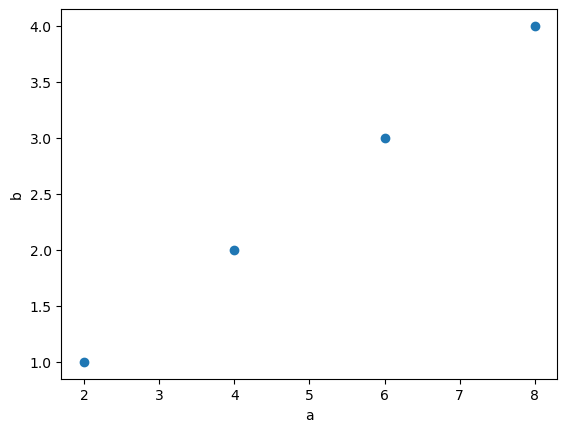

In [89]:
#｜code-fold:true
a = [2, 4, 6, 8]
b = [1, 2, 3, 4]
plt.scatter(a,b)
plt.xlabel('a')
plt.ylabel('b')

Text(0, 0.5, 'd')

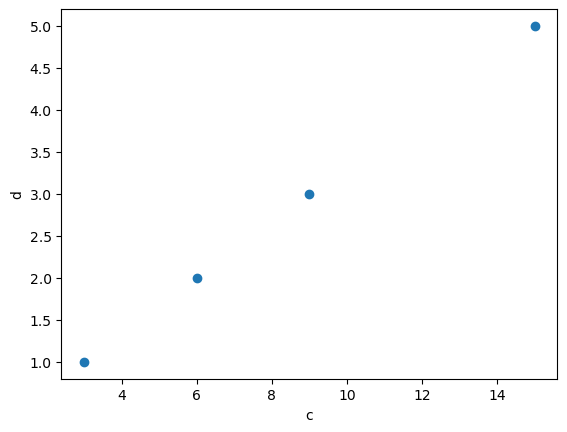

In [90]:
#|code-fold:true
c = [3, 6, 9, 15]
d = [1, 2, 3, 5]
plt.scatter(c,d)
plt.xlabel('c')
plt.ylabel('d')

In [91]:
def my_average(array):
    '''calculate the average of an array
    '''
    my_sum = 0
    for i in array:
        my_sum += i
    return my_sum/len(array)
deviation_a = [(i - my_average(a)) for i in a ]
deviation_b = [(i - my_average(b)) for i in b ]
[deviation_a[i]/deviation_b[i] for i in range(len(deviation_a))]

[2.0, 2.0, 2.0, 2.0]

In [92]:
deviation_c = [(i - my_average(c)) for i in c ]
deviation_d = [(i - my_average(d)) for i in d ]
[deviation_c[i]/deviation_d[i] for i in range(len(deviation_c))]

[3.0, 3.0, 3.0, 3.0]

我们看到，虽然 $k$ 不同，但都是一个常数。那就说明，`a` 与 `b` 的相关系数等于 `c` 与 `d` 的相关系数。

In [93]:
def covariance(xs, ys):
    """计算协方差"""
    assert len(xs) == len(ys), '数组长度必须相等！'
    x_mean = my_average(xs)
    y_mean = my_average(ys)
    cov_sum = sum((xs[i] - x_mean) * (ys[i] - y_mean) for i in range(len(xs)))
    return cov_sum / (len(xs) - 1)

In [94]:
covariance(a,b)

3.3333333333333335

In [95]:
covariance(c,d)

8.75

但是我们看到两者的协方差并不相等。这就说明协方法无法为我们检测「相互依存」的第二条性质。

那我们是否可以改良一下协方差的公式，让结果既可以测量第一条性质，也可以检测第二条呢？

第一个想法是，我们能否把 $a_i - \bar{a}$ 与 $b_i - \bar{b}$ 标准化一下，也就是变成 Z 分数：

$$\frac{Cov(a, b)}{\sigma_a \cdot \sigma_b} = \frac{\sum_{i=1}^{N}(a_i - \bar{a}) \cdot (b_i - \bar{b})}{(N-1) \cdot \sigma_a \cdot \sigma_b}$$

In [96]:
def attempt(xs, ys):
    cov = covariance(xs, ys)
    std_x = (sum((x - my_average(xs))**2 for x in xs) / (len(xs) - 1))**0.5
    std_y = (sum((y - my_average(ys))**2 for y in ys) / (len(ys) - 1))**0.5
    return cov / (std_x * std_y)

In [97]:
attempt(a, b)

1.0000000000000002

In [98]:
attempt(c, d)

1.0

我们看到结果一致。所以，我们把相关系数定义为：

$$\frac{Cov(a, b)}{\sigma_a \cdot \sigma_b}$$

## 相关系数的几何意义

如果你学过线性代数，那么当你看到

$$\sum_{i=1}^{N}(a_i - \bar{a}) \cdot (b_i - \bar{b})$$

你肯定会想到点积 (Dot Product)，也就是 $\vec{d_a} = a_i - \bar{a}$ 与 $\vec{d_b} = b_i - \bar{b}$ 之间的点积。

所以

\begin{align}
\rho(a,b) & =  \frac{Cov(a,b)}{\sigma_a \sigma_b} \\\\
 & = \frac{\frac{1}{N-1}\cdot\sum_{i=1}^N (a_i - \bar{a}) \cdot (b_i - \bar{b})}{\sigma_a \sigma_b} \\\\ 
 & = \frac{\frac{1}{N-1}\cdot \vec{d_a} \cdot \vec{d_b}}{\sigma_a \sigma_b} \\\\
 & = \frac{\frac{1}{N-1}\cdot \vec{d_a} \cdot \vec{d_b}}{\sqrt{\frac{\sum_{i=1}^N (a_i - \bar{a})^2}{N-1}} \sqrt{\frac{\sum_{i=1}^N (b_i - \bar{b})^2}{N-1}}} \\\\
 & = \frac{\frac{1}{N-1}\cdot \vec{d_a} \cdot \vec{d_b}}{\frac{1}{N-1} \sqrt{\sum_{i=1}^N (a_i - \bar{a})^2} \sqrt{\sum_{i=1}^N (b_i - \bar{b})^2}} \\\\
 & = \frac{\vec{d_a} \cdot \vec{d_b}}{\sqrt{\sum_{i=1}^N (a_i - \bar{a})^2} \sqrt{\sum_{i=1}^N (b_i - \bar{b})^2}} \\\\
 & = \frac{\vec{d_a} \cdot \vec{d_b}}{||\vec{d_a}||\cdot||\vec{d_b}||} \\\\
 & = \cos \theta \\\\
\end{align}

我们看到，相关系数在几何意义上是 $\vec{d_a} = a_i - \bar{a}$ 与 $\vec{d_b} = b_i - \bar{b}$ 之间余弦。

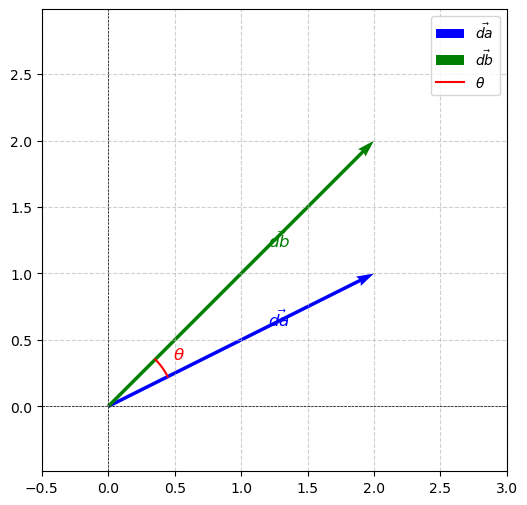

In [99]:
#| code-fold:true

# Define vectors
vector_da = np.array([2, 1])  # First vector
vector_db = np.array([2, 2])  # Second vector

# Calculate the angle between the vectors
theta = np.arctan2(vector_db[1], vector_db[0]) - np.arctan2(vector_da[1], vector_da[0])
arc_radius = 0.5

# Initialize the plot
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the vectors starting from the origin
ax.quiver(0, 0, vector_da[0], vector_da[1], angles='xy', scale_units='xy', scale=1, color='blue', label=r'$\vec{da}$')
ax.quiver(0, 0, vector_db[0], vector_db[1], angles='xy', scale_units='xy', scale=1, color='green', label=r'$\vec{db}$')

# Add labels for vectors
ax.text(vector_da[0]*0.6, vector_da[1]*0.6, r'$\vec{da}$', fontsize=12, color='blue')
ax.text(vector_db[0]*0.6, vector_db[1]*0.6, r'$\vec{db}$', fontsize=12, color='green')

# Calculate start angle and end angle for the arc
start_angle = np.arctan2(vector_da[1], vector_da[0])
end_angle = np.arctan2(vector_db[1], vector_db[0])

# Ensure we draw the smaller angle between the vectors
if theta > np.pi:
    theta = 2*np.pi - theta
    start_angle, end_angle = end_angle, start_angle

# Draw the arc from vector_da to vector_db
angle_arc = np.linspace(start_angle, end_angle, 100)
arc_x = arc_radius * np.cos(angle_arc)
arc_y = arc_radius * np.sin(angle_arc)
ax.plot(arc_x, arc_y, color='red', label=r'$\theta$')

# Adjust theta label position
theta_label_x = arc_radius * np.cos((start_angle + end_angle) / 2) * 1.2
theta_label_y = arc_radius * np.sin((start_angle + end_angle) / 2) * 1.2
ax.text(theta_label_x, theta_label_y, r'$\theta$', fontsize=12, color='red')

# Configure plot limits and aspect ratio
ax.set_xlim(-0.5, 3)
ax.set_ylim(-0.5, 3)
ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax.axvline(0, color='black', linewidth=0.5, linestyle='--')
ax.set_aspect('equal', adjustable='datalim')
ax.grid(True, linestyle='--', alpha=0.6)

# Add legend
ax.legend()

# Display the plot
plt.show()